<a href="https://colab.research.google.com/github/sudhakarmlal/EVA/blob/master/EVAAssignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
#from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


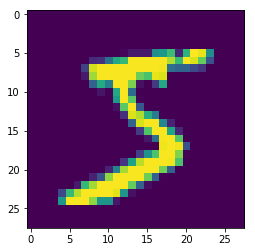

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(BatchNormalization())

# After 3*3 convolution the input is 26*26

model.add(Convolution2D(16, 3, 3, activation='relu'))


# After 3*3 convolution the input to the next layer is 24*24

model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.1))

# The input to the next layer is 22*22(after the above 3*3 convolution)

model.add(MaxPooling2D(pool_size=(2, 2)))


# The above max pooling reduced the size to 11 * 11
model.add(Convolution2D(10, 1, 1, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.1))
# The above 3*3 convolution reduced the size to 9

model.add(Convolution2D(32, 3, 3, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.1))

#The above 3*3 reduced the size to 7

#  We would  like to stop at 7*7 
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_17 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 22, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 457us/step - loss: 0.1700 - acc: 0.9469 - val_loss: 0.0680 - val_acc: 0.9773
Epoch 2/20
60000/60000 [==============================] - 25s 410us/step - loss: 0.0550 - acc: 0.9830 - val_loss: 0.0313 - val_acc: 0.9902
Epoch 3/20
60000/60000 [==============================] - 24s 399us/step - loss: 0.0439 - acc: 0.9867 - val_loss: 0.0419 - val_acc: 0.9870
Epoch 4/20
60000/60000 [==============================] - 25s 410us/step - loss: 0.0375 - acc: 0.9880 - val_loss: 0.0378 - val_acc: 0.9875
Epoch 5/20
60000/60000 [==============================] - 24s 407us/step - loss: 0.0334 - acc: 0.9895 - val_loss: 0.0311 - val_acc: 0.9901
Epoch 6/20
60000/60000 [==============================] - 24s 397us/step - loss: 0.0302 - acc: 0.9904 - val_loss: 0.0263 - val_acc: 0.9919
Epoch 7/20
60000/60000 [==============================] - 24s 397us/step - loss: 0.0277 - acc: 0.9914 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.025394323664213424, 0.9934]


### With the Above Network Architecture I got an validation score of 99.34

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.4496044e-13 1.6039233e-14 1.0498513e-08 1.0377864e-08 2.6883439e-16
  8.6586328e-17 9.7286978e-18 1.0000000e+00 8.0291894e-16 6.2602519e-12]
 [8.6899293e-11 7.3069883e-10 1.0000000e+00 9.1178237e-16 7.1257778e-14
  1.9474522e-17 5.9509730e-10 5.0052548e-16 1.1648688e-12 1.0209732e-14]
 [1.5792108e-10 9.9999630e-01 7.2698140e-07 2.0724568e-12 5.2861409e-08
  3.9863414e-07 1.4621352e-08 2.4652381e-06 3.0339937e-09 2.7024882e-08]
 [9.9998569e-01 1.0242271e-15 1.1330362e-09 2.4319629e-09 1.7016515e-09
  7.1952098e-09 1.4252775e-05 2.0358545e-11 4.7020952e-09 3.8691013e-08]
 [1.9249697e-13 1.0523065e-13 2.8521930e-11 1.1063635e-14 1.0000000e+00
  1.1045117e-15 1.0560289e-12 2.0892370e-12 7.0131390e-13 2.1344214e-08]
 [1.6414753e-10 9.9998558e-01 6.8931809e-07 2.1034158e-13 3.5906211e-07
  9.3701562e-09 4.7004085e-09 1.3309129e-05 2.4948401e-09 1.7651573e-08]
 [1.8165762e-14 1.7799874e-13 6.8946732e-10 6.1914370e-17 9.9999857e-01
  9.3996779e-15 5.6640593e-15 1.3831235e-09 1.2952830e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored